In [1]:
import librosa
import numpy as np
from pydub import AudioSegment
from sklearn import preprocessing
from scipy import signal
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
pathAudio = 'C:/Users/Admin/OneDrive/Dokumente/Studium/Technology Lab/Technology Lab Team 4/Techno Titel/train/samples-stochastic/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))

In [3]:
def normalize_sample(sample):
    array_of_samples = sample.get_array_of_samples()
    np_arr = np.array(array_of_samples)
    np_arr = np_arr.reshape(1, -1)
    return preprocessing.normalize(np_arr)


samples = []
samples_sec_canal = []
for file_name in files:
    sample = AudioSegment.from_mp3(file_name)
    mono_samples = sample.split_to_mono()
    normalized_sample = normalize_sample(mono_samples[0])[0]
    resampled_sample = signal.resample(normalized_sample, int(len(normalized_sample) / 35))
    samples.append(resampled_sample)
    normalized_sample_sec_canal = normalize_sample(mono_samples[1])[0]
    resampled_sample_sec_canal = signal.resample(normalized_sample_sec_canal, int(len(normalized_sample) / 35))
    samples_sec_canal.append(resampled_sample_sec_canal)

In [4]:
example_sample = samples[1]
example_sample

array([ 0.01046384, -0.01274051,  0.00560238, ...,  0.00052186,
       -0.00885113,  0.0048478 ])

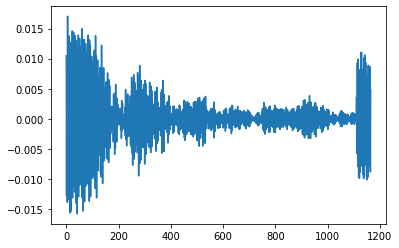

In [5]:
plt.plot(example_sample)
plt.show()

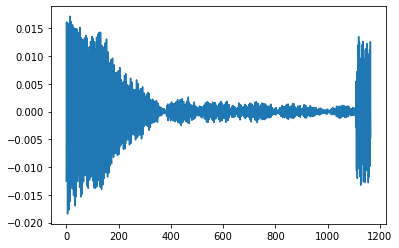

In [6]:
plt.plot(samples_sec_canal[1])
plt.show()

In [7]:
samples = np.array(samples)
full_song = []
for sample in samples:
    full_song.extend(sample)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21672\2919224953.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


In [8]:
full_song = np.array(full_song)
full_song.shape

(279704,)

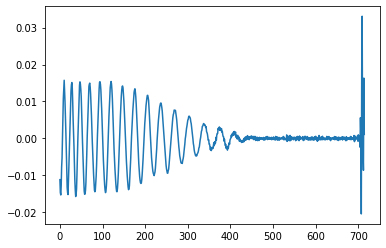

In [9]:
plt.plot(samples[9])
plt.show()

In [10]:
frami = pd.DataFrame(columns=['actual'], data=full_song[:100000])
frami

,actual
0,-0.000724
1,0.000196
2,-0.000125
3,0.000092
4,-0.000072
...,...
99995,0.000050
99996,0.000005
99997,-0.000102
99998,0.000101


In [11]:
len(min(samples, key=len))

570

In [12]:
batch_size = 2000
steps = 10
sum_batch_size = batch_size + steps
X = []
Y = []
for i in range(0, len(full_song) - batch_size, steps):
    if i < len(full_song) - sum_batch_size:
        X.append(np.array(full_song[i:i + batch_size]))
        Y.append(True)

In [13]:
X = np.array(X)
X.shape

(27770, 2000)

In [14]:
X[10][10:20]

array([0.00016172, 0.00020079, 0.00017303, 0.00023787, 0.00019988,
       0.00024581, 0.00018642, 0.00019362, 0.00012672, 0.00012519])

In [15]:
X[11][:10]

array([0.00016172, 0.00020079, 0.00017303, 0.00023787, 0.00019988,
       0.00024581, 0.00018642, 0.00019362, 0.00012672, 0.00012519])

In [16]:
X = np.array(X).reshape(-1, batch_size, 1)
Y = np.array(Y).reshape(-1, 1)

In [17]:
X.shape

(27770, 2000, 1)

In [18]:
Y.shape

(27770, 1)

In [30]:
Y[:10]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [19]:
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=100, kernel_size=4, input_shape=(2000, 1)))
model.add(MaxPool1D(pool_size=4, strides=4))
model.add(LSTM(200, activation='sigmoid')) #499
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #sgd
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1997, 100)         500       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 100)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 241,501
Trainable params: 241,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X, Y, epochs=1)

868/868 [==============================] - 421s 484ms/step - loss: 0.0022 - accuracy: 0.9988


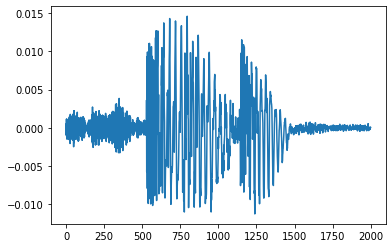

In [31]:
example_x_train = full_song[4000:6000]
plt.plot(example_x_train)
plt.show()

In [32]:
example_x_train = example_x_train.reshape(1, 2000, 1)
example_x_train.shape

(1, 2000, 1)

In [33]:
model.predict(example_x_train)

array([[1.6991118]], dtype=float32)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21672\498611980.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples_sec_ch = np.array(samples_sec_canal)


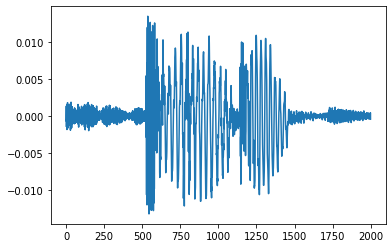

In [34]:
samples_sec_ch = np.array(samples_sec_canal)
full_song_sec_ch = []
for sample in samples_sec_ch:
    full_song_sec_ch.extend(sample)
second_channel_data = full_song_sec_ch[4000:6000]
plt.plot(second_channel_data)
plt.show()

In [35]:
second_channel_data = np.array(second_channel_data)
second_channel_data = second_channel_data.reshape(1, 2000, 1)
second_channel_data.shape

(1, 2000, 1)

In [36]:
model.predict(second_channel_data)

array([[1.6991515]], dtype=float32)

In [37]:
1699112 - 1699152

-40

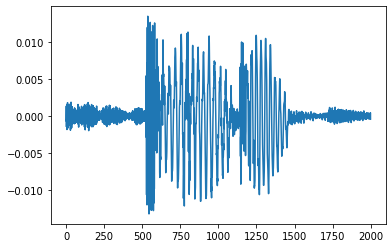

In [39]:
plt.plot(second_channel_data[0])
plt.show()

In [66]:
extracted_sample = full_song_sec_ch[4000:6000]
new_start = extracted_sample[999:1999]
new_end = extracted_sample[0:1000]
print(len(new_start))
print(len(new_end))

1000
1000


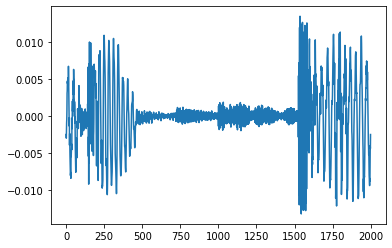

In [67]:
switched_sample = new_start + new_end
plt.plot(switched_sample)
plt.show()

In [68]:
switched_sample = np.array(switched_sample)
switched_sample = switched_sample.reshape(1, 2000, 1)
switched_sample.shape

(1, 2000, 1)

In [69]:
model.predict(switched_sample)

array([[1.6994742]], dtype=float32)

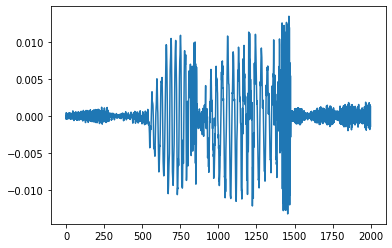

In [76]:
reversed_data = full_song_sec_ch[4000:6000]
reversed_data = np.array(reversed_data)
reversed_data = [num for num in reversed(reversed_data)]
plt.plot(reversed_data)
plt.show()

In [77]:
reversed_data = np.array(reversed_data)
reversed_data = reversed_data.reshape(1, 2000, 1)
reversed_data.shape

(1, 2000, 1)

In [78]:
model.predict(reversed_data)

array([[1.6994342]], dtype=float32)

In [ ]:
#filename = 'model_weights.h5'
#model.save(filename)